In [35]:
import xarray as xr, cartopy, matplotlib.pyplot as plt, geopandas as gpd, numpy as np

# load data
da = xr.open_dataset("rainfall_hadukgrid_uk_25km_mon_202303.nc").rainfall

# load shapefile
sf = gpd.read_file("sf_ukland/")

# Plot on OSGB grid

In [41]:
# define the projection you want to plot on (basically the OSGB, but can change the extent more easily)
mapproj = cartopy.crs.TransverseMercator(approx = False, central_longitude = -2, central_latitude = 49, scale_factor = 0.9996012717, 
                                         false_easting = 400000, false_northing = -100000, globe = cartopy.crs.Globe(datum = 'OSGB36', ellipse = 'airy'))
mapproj.bounds = [-2e5, 7e5, -1e5, 12.2e5]

<GeoAxesSubplot: >

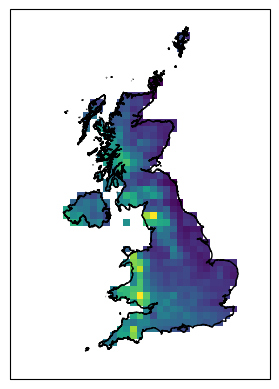

In [22]:
fig, ax = plt.subplots(ncols = 1, nrows = 1, subplot_kw = {"projection" : mapproj})
ax.pcolormesh(da.projection_x_coordinate, da.projection_y_coordinate, da.isel(time = 0))
sf.boundary.plot(ax = ax, color = "k", lw = 1)

## Plot lat/lon data on OSGB axes

In [53]:
# get x & y coordinates for projected plotting
def project_latlon(da, to_crs):
        
    if "lon" in da.dims: da = da.rename(lon = "longitude", lat = "latitude")
    
    # convert dataArray to dataframe
    df = da.to_dataframe().reset_index()
    
    # convert to geoDataFrame, reproject points to Statistics Canada Lambert 
    gdf = gpd.GeoDataFrame(df[df.columns[-1]], geometry = gpd.points_from_xy(df.longitude, df.latitude))
    gdf = gdf.set_crs(epsg = 4326).to_crs(to_crs)
    
    x = np.reshape(np.array(gdf.geometry.x), da.shape)
    y = np.reshape(np.array(gdf.geometry.y), da.shape)
    
    return x,y

In [91]:
latlon_da = xr.open_dataset("lat-lon-data.nc").precipitation.isel(time = 0)
x, y = project_latlon(latlon_da, mapproj)      # only works with data of dimensions x, y (so you have to remove the time dimension)

<GeoAxesSubplot: >

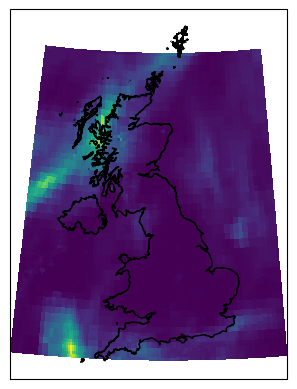

In [92]:
fig, ax = plt.subplots(ncols = 1, nrows = 1, subplot_kw = {"projection" : mapproj})
ax.pcolormesh(x, y, latlon_da)
sf.boundary.plot(ax = ax, color = "k", lw = 1)

# Plot on lat-lon grid

In [24]:
mapproj = cartopy.crs.PlateCarree()

<GeoAxesSubplot: >

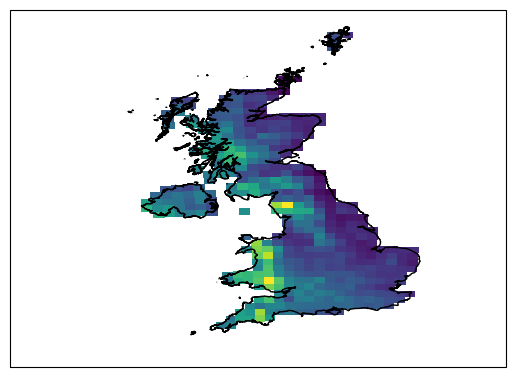

In [29]:
fig, ax = plt.subplots(ncols = 1, nrows = 1, subplot_kw = {"projection" : mapproj})
ax.pcolormesh(da.longitude, da.latitude, da.isel(time = 0))
sf.to_crs(mapproj).boundary.plot(ax = ax, color = "k", lw = 1)